1. Importar as bibliotecas "Pandas" e "Numpy" (Usaremos as abreviações pd e np, respectivamente, para faciliar a notação.
Importe também a biblioteca Math.

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

2. Defina a variável "arquivo" pelo nome do arquivo da planilha.
Defina também a variável "coluna". Essa variável definirá qual a variável será considerada para a construção da tabela.

In [ ]:
arquivo = 'energia sustentável 1.xlsx'
coluna = 'Eletricidade de fontes renováveis ​​(TWh)'

3. Leia a planilha no Phyton (para isso use o comando pd.read_excel(...) ). Dê um nome (nesse caso chamaremos de "df").

In [ ]:
df=pd.read_excel(arquivo)

4. Vamos encontrar a amplitude total dos dados.

In [ ]:
at = df[coluna].max() - df[coluna].min()

4. Vamos decidir quantas classes terá a tabela.

Podemos utilizar k como sendo a raiz quadrada do total de registros/amostras, ou fixar um valor.

In [ ]:
k=10
#k=math.sqrt(len(df))
#podemos ajusatr o valor de k se quisermos, bast atribuir um número fazendo, por exemplo k=5, ele terá 6 calsses (de 0 a 5)

5. Vamos calcular a amplitude de cada classe (chamaremos essa variável de "amplitude_classe").

O valor de amplitude de classe pode ser arredondado para um número inteiro, geralmente para facilitar a interpretação da tabela (use o comando math.ceil(...) para realizar esse arredondamento).

In [ ]:
h = at/k
amplitude_classe = math.ceil(h)
amplitude_classe
#podemos ajustar a amplitude da classe atribuindo um valor para h

219

6. Vamos criar duas variáveis que armazenarão da coluna que estamos trabalhando o seu valor mínimo arredondado para baixo e o seu valor máximo sem arredondamento. (O comando np.floor arredonda o valor para baixo).

In [ ]:
limite_min=np.floor(df[coluna].min())
valor_max=df[coluna].max()

7. Vamos agora gerar as classes da tabela.

Para isso começaremos criando uma lista vazia e que serão inseridas as classes que criaremos.

Crie uma variável (limite_inferior) que receberá o valor limite_min.

Para gerar as classes, usaremos um loop do tipo while.

In [ ]:
classes=[]
limite_inferior = limite_min

while True:
  classes.append([limite_inferior,limite_inferior +amplitude_classe])
  limite_inferior = limite_inferior + amplitude_classe
  if limite_inferior > valor_max:
    break

8. Vamos criar uma lista para cada classe criada no passo anterior.

Por exemplo, a lista da primeira classe será composta pelos elementos do banco de dados (planilha) que pertecem ao intervalo da primeira classe. E assim sucessivamente.


In [ ]:
valores_classes=[]
for classe in classes:
  filtro=df[(classe[0]<=df[coluna])&(df[coluna]<classe[1])][coluna]
  valores_classes.append(list(filtro))

9. Vamos contar o número de elementos de cada uma das listas da variável "valores_classes".

In [ ]:
n_elementos=[]
for k in range(len(valores_classes)):
  n_elementos.append(len(valores_classes[k]))

10. Vamos gerar o data frame que irá compor a tabela de frequências por classes.

In [ ]:
tabela=pd.DataFrame({'Classes - Eletricidade de fontes renováveis ​​(TWh)*':classes,'Frequência':n_elementos})

In [ ]:
tabela
print(tabela, ' \n    *Limites superiores do intervalo de classes não incluídos')

  Classes - Eletricidade de fontes renováveis ​​(TWh)*  Frequência
0                                       [0.0, 219.0]          3537
1                                     [219.0, 438.0]            59
2                                     [438.0, 657.0]            15
3                                     [657.0, 876.0]             8
4                                    [876.0, 1095.0]             2
5                                   [1095.0, 1314.0]             1
6                                   [1314.0, 1533.0]             2
7                                   [1533.0, 1752.0]             1
8                                   [1752.0, 1971.0]             1
9                                   [1971.0, 2190.0]             2  
    *Limites superiores do intervalo de classes não incluídos


In [ ]:
classes2 = [0, 219, 438, 657, 876, 1095, 1314, 1533, 1752, 1971, 2190]

11. Vamos acrescentar no data frame uma coluna chamada Frequência Relativa.

O comando round(...,2) arredonda para 2 casas decimais.

In [ ]:
tabela['Freq. Relativa (%)']=round(tabela['Frequência']*100/tabela['Frequência'].sum(),2)

In [ ]:
tabela

,Classes - Eletricidade de fontes renováveis ​​(TWh)*,Frequência,Freq. Relativa (%)
0,"[0.0, 219.0]",3537,97.49
1,"[219.0, 438.0]",59,1.63
2,"[438.0, 657.0]",15,0.41
3,"[657.0, 876.0]",8,0.22
4,"[876.0, 1095.0]",2,0.06
5,"[1095.0, 1314.0]",1,0.03
6,"[1314.0, 1533.0]",2,0.06
7,"[1533.0, 1752.0]",1,0.03
8,"[1752.0, 1971.0]",1,0.03
9,"[1971.0, 2190.0]",2,0.06


12. Para incluir as informações sobre a tabela (Nome da Variável) e alguma observação, use o comando abaixo.

In [ ]:
print(tabela)
print(f'\n      Variável:{coluna}')
print('     *Limites superiores do intervalo de classes não incluídos')

  Classes - Eletricidade de fontes renováveis ​​(TWh)*  Frequência  \
0                                       [0.0, 219.0]          3537   
1                                     [219.0, 438.0]            59   
2                                     [438.0, 657.0]            15   
3                                     [657.0, 876.0]             8   
4                                    [876.0, 1095.0]             2   
5                                   [1095.0, 1314.0]             1   
6                                   [1314.0, 1533.0]             2   
7                                   [1533.0, 1752.0]             1   
8                                   [1752.0, 1971.0]             1   
9                                   [1971.0, 2190.0]             2   

   Freq. Relativa (%)  
0               97.49  
1                1.63  
2                0.41  
3                0.22  
4                0.06  
5                0.03  
6                0.06  
7                0.03  
8            

13. Vamos acrescentar no data frame uma coluna chamada Frequência Acumulada.

Esta coluna mostra a soma das frequências acumuladas.

In [ ]:
tabela['Freq. Acumulada'] = tabela['Frequência'].cumsum()
tabela

,Classes - Eletricidade de fontes renováveis ​​(TWh)*,Frequência,Freq. Relativa (%),Freq. Acumulada
0,"[0.0, 219.0]",3537,97.49,3537
1,"[219.0, 438.0]",59,1.63,3596
2,"[438.0, 657.0]",15,0.41,3611
3,"[657.0, 876.0]",8,0.22,3619
4,"[876.0, 1095.0]",2,0.06,3621
5,"[1095.0, 1314.0]",1,0.03,3622
6,"[1314.0, 1533.0]",2,0.06,3624
7,"[1533.0, 1752.0]",1,0.03,3625
8,"[1752.0, 1971.0]",1,0.03,3626
9,"[1971.0, 2190.0]",2,0.06,3628


14. Vamos acrescentar no data frame uma coluna chamada Frequência Relativa Acumulada.

Esta coluna mostra a soma das frequências relativas acumuladas.

In [ ]:
tabela['Freq. Relativa Acumulada'] = tabela['Freq. Relativa (%)'].cumsum()
tabela

,Classes - Eletricidade de fontes renováveis ​​(TWh)*,Frequência,Freq. Relativa (%),Freq. Acumulada,Freq. Relativa Acumulada
0,"[0.0, 219.0]",3537,97.49,3537,97.49
1,"[219.0, 438.0]",59,1.63,3596,99.12
2,"[438.0, 657.0]",15,0.41,3611,99.53
3,"[657.0, 876.0]",8,0.22,3619,99.75
4,"[876.0, 1095.0]",2,0.06,3621,99.81
5,"[1095.0, 1314.0]",1,0.03,3622,99.84
6,"[1314.0, 1533.0]",2,0.06,3624,99.90
7,"[1533.0, 1752.0]",1,0.03,3625,99.93
8,"[1752.0, 1971.0]",1,0.03,3626,99.96
9,"[1971.0, 2190.0]",2,0.06,3628,100.02


15. Descobrindo a moda da variável.

Esta coluna mostra a soma das frequências relativas acumuladas.

In [ ]:
moda = df['Eletricidade de fontes renováveis ​​(TWh)'].mode()
moda

0    0.0
Name: Eletricidade de fontes renováveis ​​(TWh), dtype: float64

16. Descobrindo a media da variável.


In [ ]:
media = df['Eletricidade de fontes renováveis ​​(TWh)'].mean()
round(media)

24

17. Gráfico para variáveis qualitativas e quantitativas


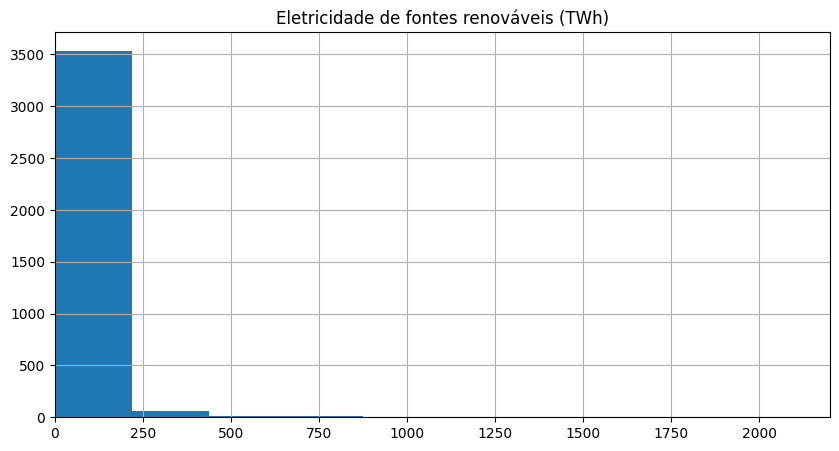

In [ ]:
plt.rcParams["figure.figsize"]=(10,5)
df.hist(column = coluna, bins = classes)
plt.xlim(0,2200)
plt.show()